In [ ]:
#connect google colab with google drive
from google.colab import drive
drive.mount("/content/gdrive")
     

Mounted at /content/gdrive


In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/train.zip')


#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()



In [ ]:
#import the libraries to load dataset
import zipfile
import os

#opens file in readmode
zip_ref = zipfile.ZipFile('/content/gdrive/MyDrive/MajorProject/br35hdataset/test.zip')

#extracts the files into the /MajorProject folder
zip_ref.extractall('/content/gdrive/MyDrive/MajorProject/br35hdataset')

#close the file
zip_ref.close()

In [ ]:
import os
import glob

folder_path = '/content/gdrive/MyDrive/MajorProject/br35hdataset/train'  # replace with the actual folder path

yes_path = os.path.join(folder_path, 'yes')
no_path = os.path.join(folder_path, 'no')

yes_count = len(glob.glob(os.path.join(yes_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images
no_count = len(glob.glob(os.path.join(no_path, '*.jpg')))  # replace '*.jpg' with the actual file extension of your images

print(f'Total images in "yes" folder: {yes_count}')
print(f'Total images in "no" folder: {no_count}')
print(yes_count+no_count)


Total images in "yes" folder: 7180
Total images in "no" folder: 7220
14400


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [ ]:
# Define data generators for training, validation, and testing sets
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/train',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

valid_generator = valid_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/validation',
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='binary')

test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/test',
                                                  target_size=(256, 256),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 14400 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
# Add a new classification layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)

In [ ]:
predictions = Dense(1, activation='sigmoid')(x)

In [ ]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Create a new model by combining the pre-trained ResNet50 with the new classification layer
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=30, validation_data=valid_generator, validation_steps=len(valid_generator))

Epoch 1/30
 19/450 [>.............................] - ETA: 1:44 - loss: 7.4877e-06 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
# Save the model
model.save('/content/gdrive/MyDrive/MajorProject/resnet.h5')

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
resnet_model = load_model('/content/gdrive/MyDrive/MajorProject/resnet-tranfer-learning.h5')

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print('Test accuracy:', test_acc)

57/57 [==============================] - 13s 234ms/step - loss: 0.0165 - accuracy: 0.9961
Test accuracy: 0.9961110949516296


57/57 [==============================] - 14s 227ms/step
[[445 451]
 [450 454]]


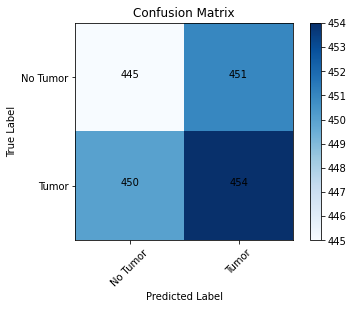

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on test set
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)

# Generate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

print(cm)

# Define class names
class_names = ['No Tumor', 'Tumor']

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.colorbar()
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="black" if cm[i, j] > cm.max() / 2 else "black")
plt.show()



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory('/content/gdrive/MyDrive/MajorProject/br35hdataset/test',
                                                  target_size=(256, 256),
                                                  batch_size=32,
                                                  class_mode='binary')

Found 1800 images belonging to 2 classes.


In [ ]:
# Make predictions on test set
y_pred = resnet_model.predict(test_generator)


57/57 [==============================] - 265s 5s/step


NameError: ignored

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.round(y_pred)
from sklearn.metrics import classification_report, confusion_matrix


# Convert the predicted labels to binary values (0 or 1)
y_pred_binary = np.argmax(y_pred, axis=1)
# Generate confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
# Calculate precision, recall, sensitivity, specificity, f1 score, and f beta score
tn, fp, fn, tp = cm.ravel()
precision = tp / (tp + fp)
recall = tp / (tp + fn)
sensitivity = recall
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)
beta = 2
f_beta_score = (1 + beta ** 2) * (precision * recall) / (beta ** 2 * precision + recall)

# Print the metrics
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))
print("F1 Score: {:.4f}".format(f1_score))
print("F Beta Score: {:.4f}".format(f_beta_score))


Precision: 0.5017
Recall: 0.5022
Sensitivity: 0.5022
Specificity: 0.4967
F1 Score: 0.5019
F Beta Score: 0.5021


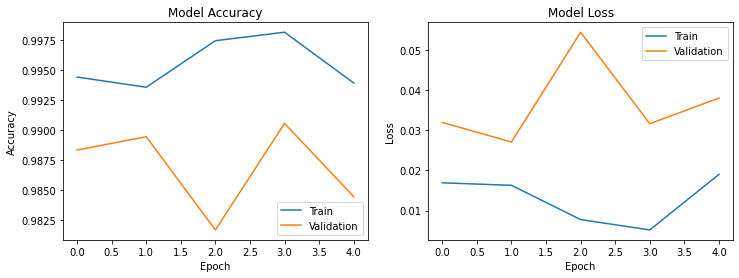

In [ ]:
# Plot training vs test accuracy and loss, and training vs validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()